
# Fourier Transform Laboratory


## Real and Reciprocal Lattice

part of 
## [MSE672- Introduction to Transmission Electron Microsocpy](_MSE672-IntroToTEM.ipynb)


## Chapter 2 [Diffraction](Diffraction.ipynb)

by Gerd Duscher, Fall 2018




## First we import some important packages 


In [139]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots
%pylab --no-import-all notebook


Populating the interactive namespace from numpy and matplotlib


# Fourier Transform Input


<IPython.core.display.Javascript object>


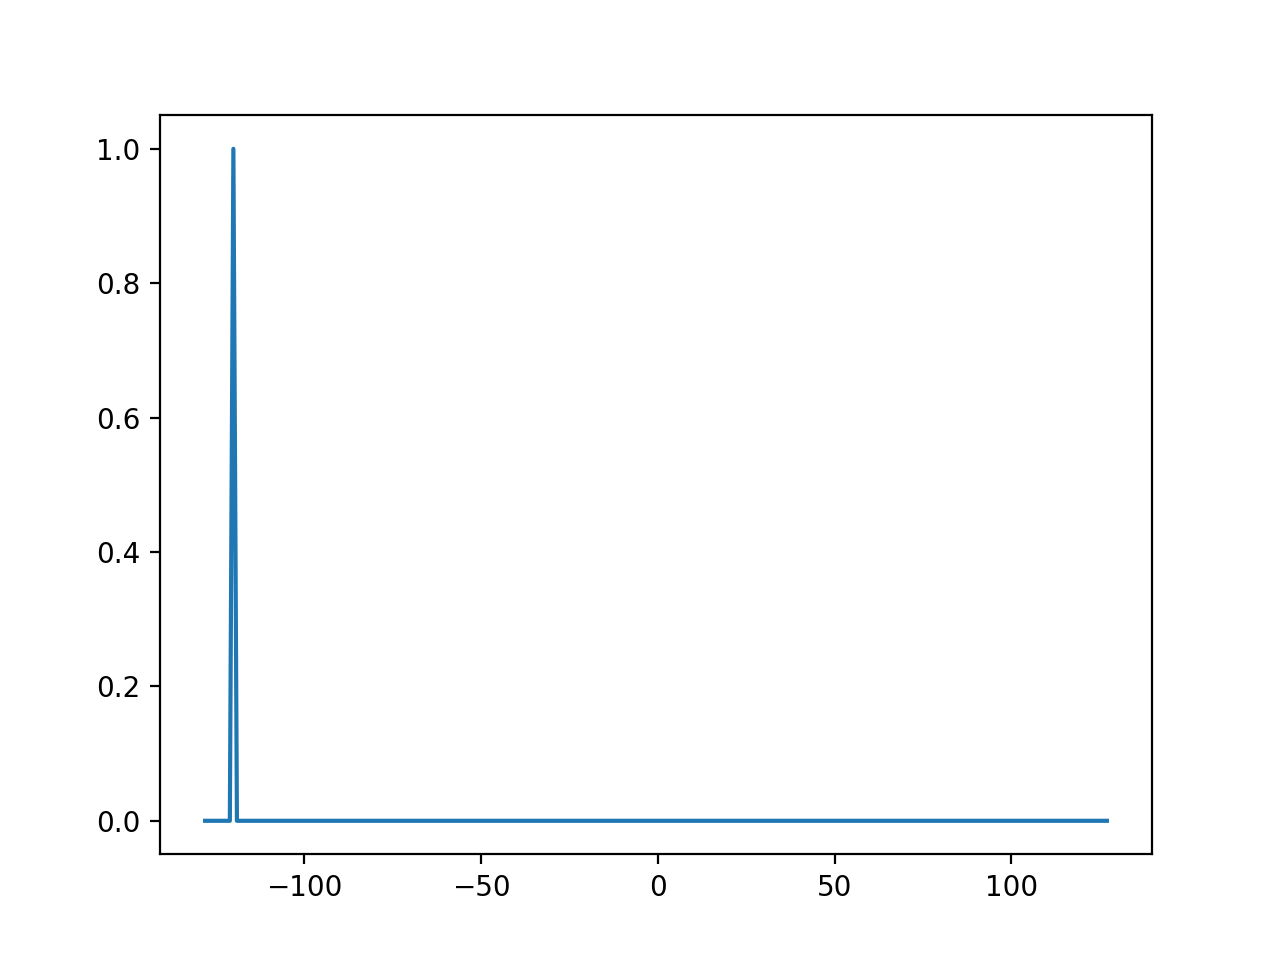

In [142]:
length = 256
half = int(length/2)
x_axis  = np.arange(length)-half
real_space = np.zeros(length)
real_space[half] = 0.
real_space[half-10] = 0.
real_space[half+10-1] = 0.
real_space[half-120] = 1.
real_space[half+120] = 0.


for i in range(int(length/4)):
#    if i % 2:
#        real_space[i*4] = 1.
#    else:
#        real_space[i*4] = .5
    pass

plt.figure()
plt.plot(x_axis, real_space);

# Fourier Transform Output

<IPython.core.display.Javascript object>


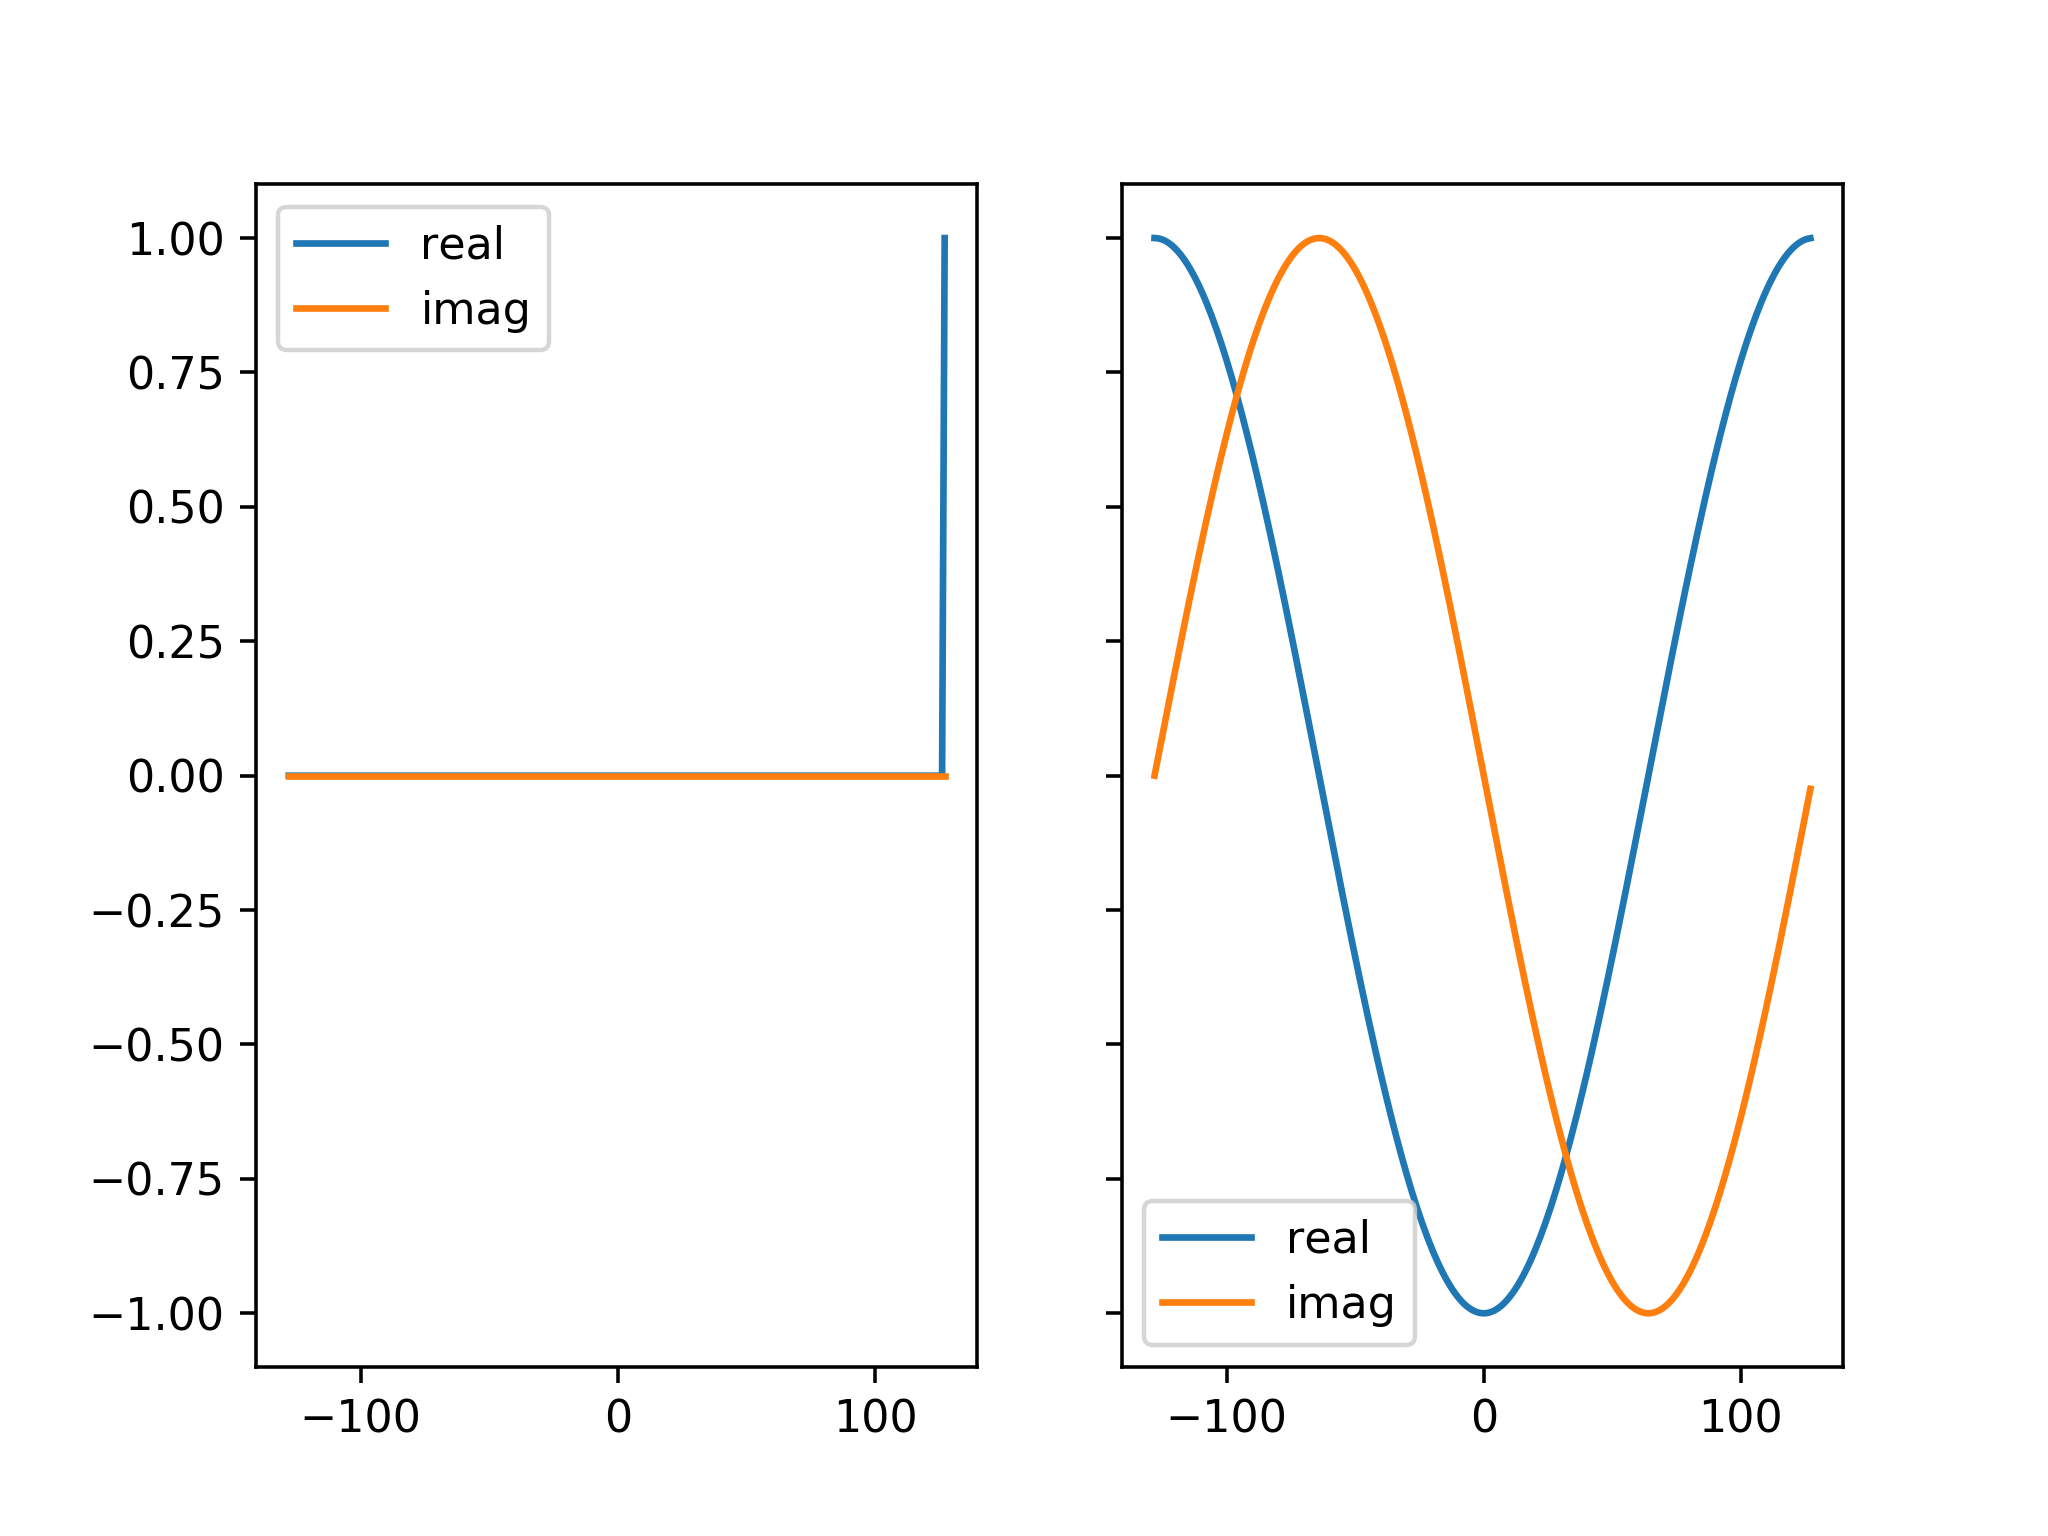

In [143]:
real_space = np.zeros(length)
real_space[half] = 0.
real_space[half-10] = 0.
real_space[half+10-1] = 0.
real_space[half-127] = 0.
real_space[half+127] = 1.

fourier_space = np.fft.fft(real_space)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, dpi=160)

ax1.plot(x_axis, real_space.real , label='real')
ax1.plot(x_axis, real_space.imag , label='imag')
ax1.legend();

ax2.plot(x_axis, fourier_space.real , label='real')
ax2.plot(x_axis, fourier_space.imag , label='imag')
ax2.legend();


# Inverse Fourier Transform

<IPython.core.display.Javascript object>


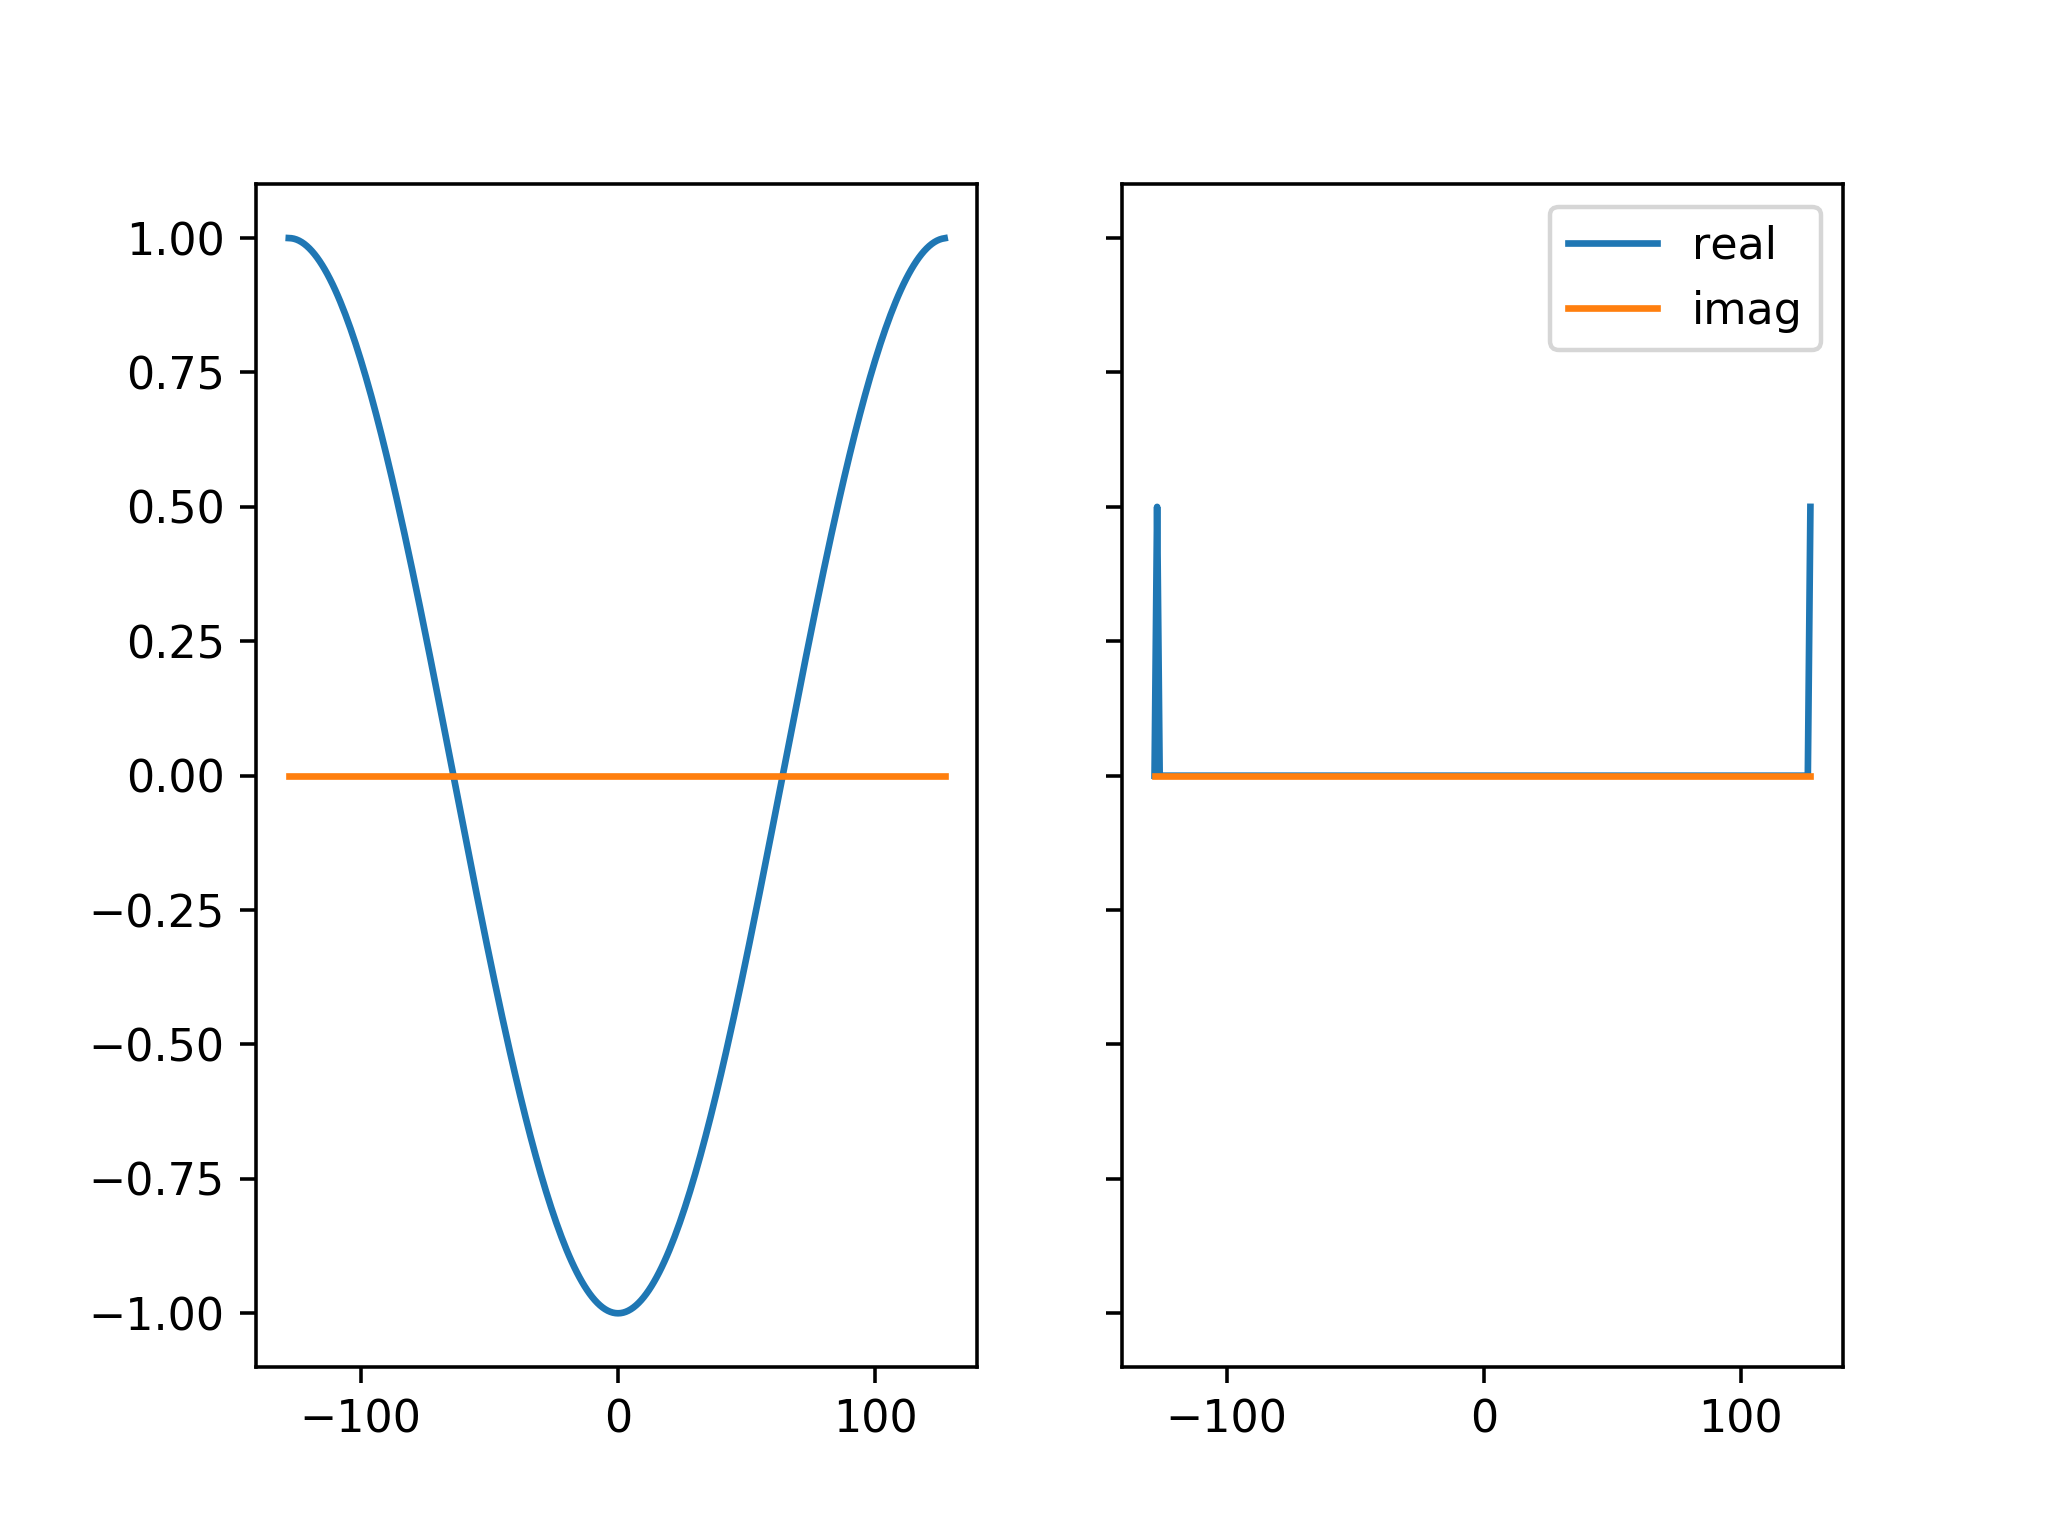

In [145]:
fourier_space.imag = 0
real_space_2 = np.fft.ifft(fourier_space)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, dpi=160)
ax1.plot(x_axis, fourier_space.real , label='real')
ax1.plot(x_axis, fourier_space.imag , label='imag')
ax2.plot(x_axis, real_space_2.real , label='real')
ax2.plot(x_axis, real_space_2.imag , label='imag')
ax2.legend();

## And now in 3D

The Fourier Transform of the sample shape is a major contributer to the possible excitation error

<IPython.core.display.Javascript object>


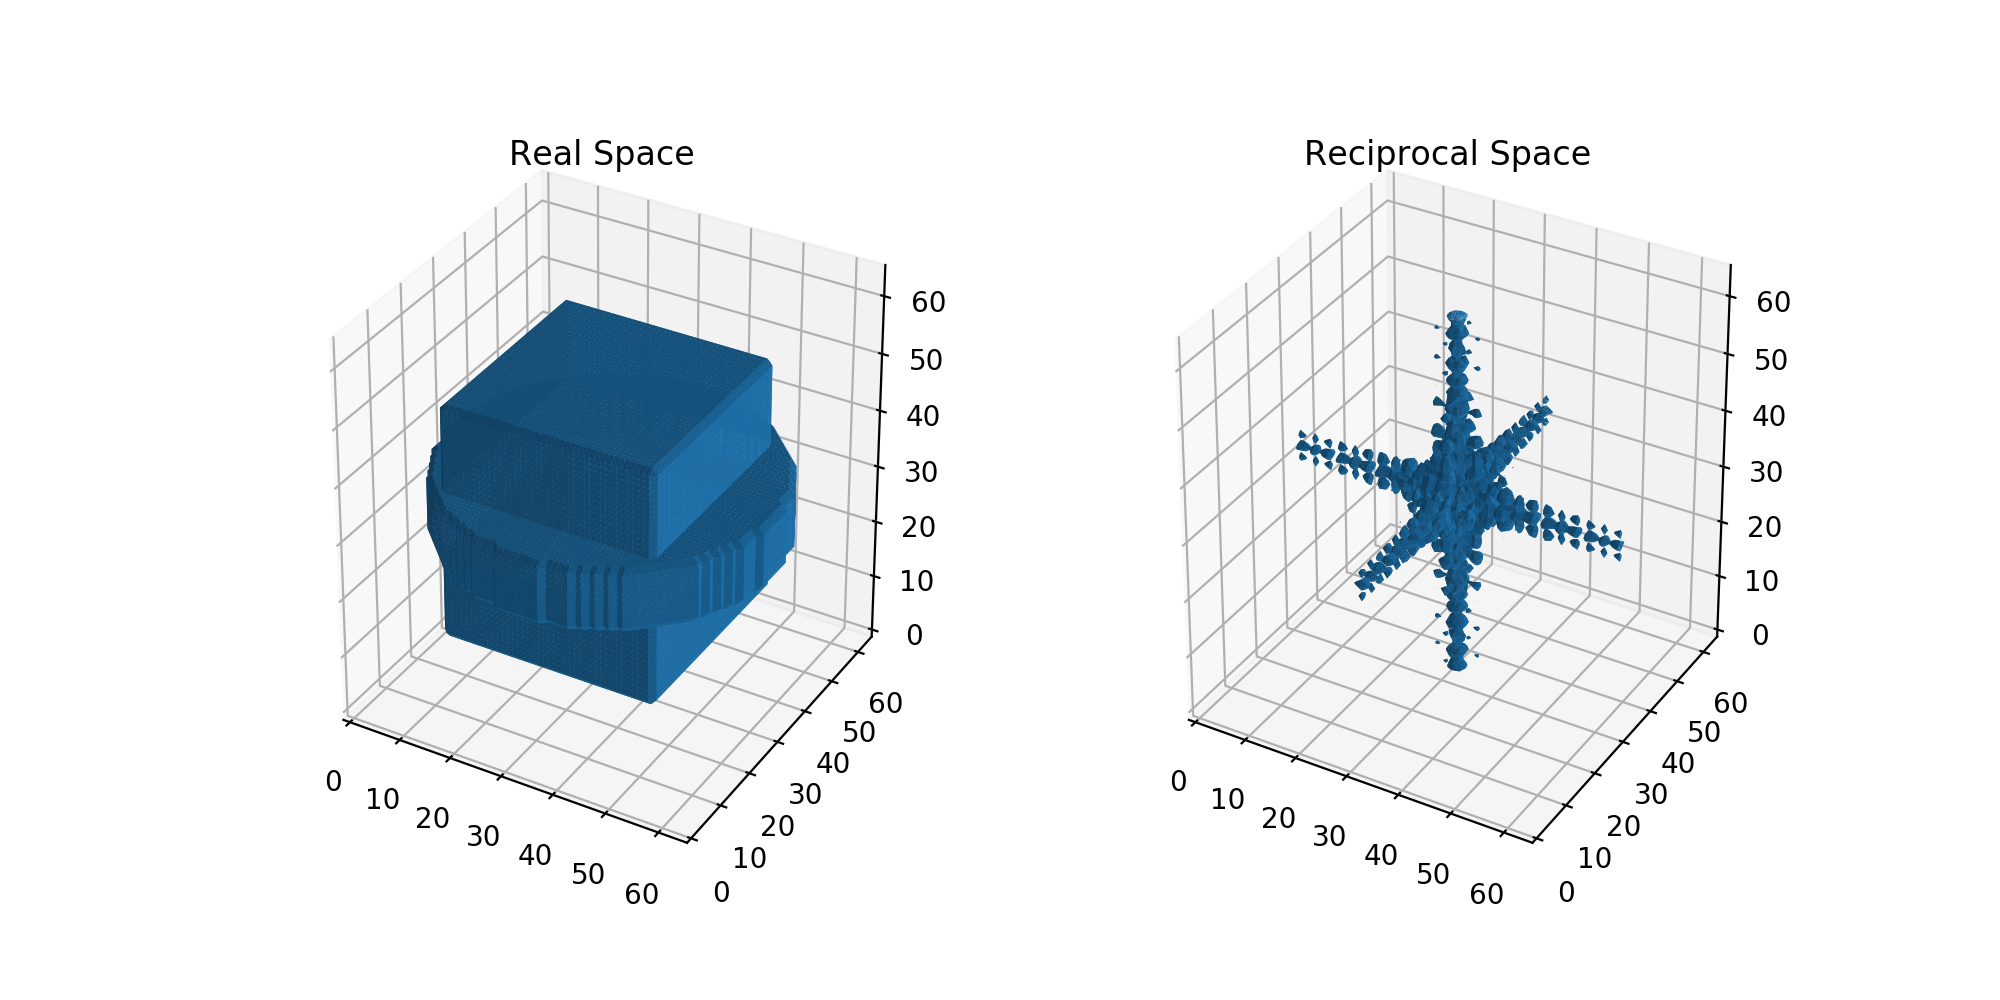

In [153]:

from skimage import measure
from mpl_toolkits.mplot3d import Axes3D

##################
# Make a disk
##################
s = 32
vol = np.zeros((32*2,32*2,32*2)) 

# Make one circle
circle = np.zeros((64,64))
for x in range (-32,32):
    for y in range(-32,32):
        if x**2+y**2 < s**2-100:
            circle[x+32,y+32]=1
# Make a disk by copying the full circle      
thickness = 10
for z in range(int(s-thickness/2),int(s+thickness/2)):
    vol[:,:,z] = circle

# Make a cube
s = 32
#vol = np.zeros((32*2,32*2,32*2)) 
width = 20
vol[s-width:s+width,s-width:s+width,s-width:s+width] = 1
            
# Fourier Transform in 3D
ft = np.fft.fftshift(np.fft.fftn(vol))

#Make surfaces from volume
verts, faces, _, _ = measure.marching_cubes_lewiner(np.absolute(ft), 400.) 
rverts, rfaces, _, _ = measure.marching_cubes_lewiner(vol, 0)  


fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_trisurf(rverts[:, 0], rverts[:,1], rfaces, rverts[:, 2], lw=1)
ax1.set_xlim(0, 64)  
ax1.set_ylim(0, 64)  
ax1.set_zlim(0, 64) 
ax1.set_title('Real Space')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], lw=1)
ax2.set_xlim(0, 64)  
ax2.set_ylim(0, 64)  
ax2.set_zlim(0, 64) 
ax2.set_title('Reciprocal Space');

## Conclusions

Fourier transform of symmetric function do not have a imaginary component.

Imaginary Fourier components are often associated with absorption. Why?

## Back: [Atomic Form Factor](Atomic_Form_Factor.ipynb)
## Next: [Structure Factors](Structure_Factors.ipynb)
## Chapter 2: [Diffraction](Diffraction.ipynb)
## List of Content: [Front](_MSE672-IntroToTEM.ipynb)

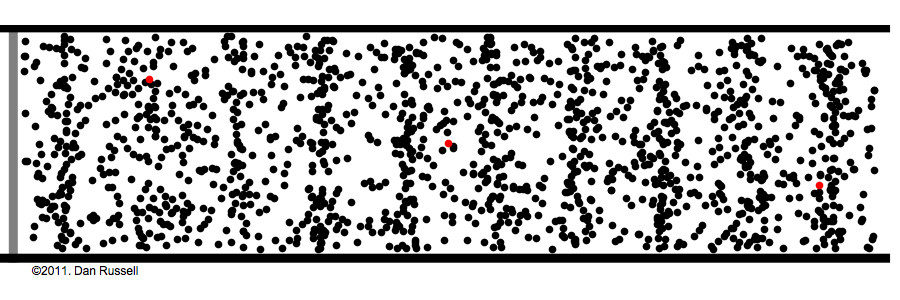
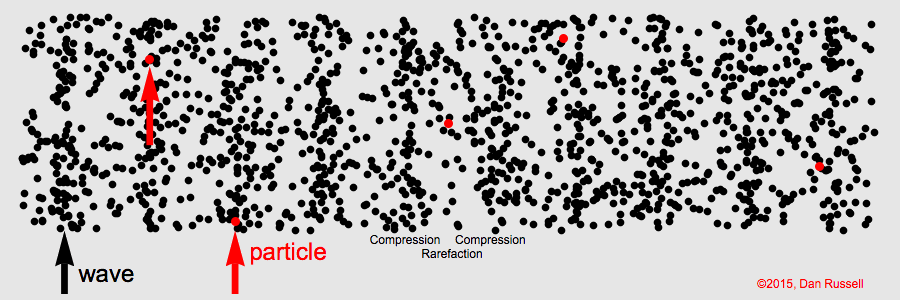